## DDA: 전처리 과정 및 분석

### 데이터타입 분석

|no|Variable|Definition|Key|분석가 의견|
|--|--|--|--|--|
|1|_id|매물 각각에 대한 unique id||unique id이기에 유의미한 분석 불가|
|2|title|매물번호-매물 각각에 대한 unique id||상기동일|
|3|roomName|매물번호-매물 각각에 대한 unique id||상기동일, 위와 중복 데이터이므로 삭제|
|4|gender|매물의 성별구분 유무|공용|공용/여성전용/남성전용을 분리할 목적이었으나 '공용' 데이터만 있기에 열 삭제 가능|
|5|roomType|다인실 구분|'1인실', '그 외'|범주형 데이터 - 이후 숫자로 구분 필요|
|6|py|평수|1.99㎡~132㎡|명목형 데이터(string)이므로 ㎡ 삭제 후 float으로 변환 필요|
|7|deposit|매물의 보증금|10만원~3억만원|명목형 데이터(string)이므로 삭제 후 '만원'은 '', '억만원'은 0000로 변환 필요|
|8|rentFee|매물의 월세|12만원~280만원|명목형 데이터(string)이므로 '만원'을 ''로 변환 필요|
|9|region|매물의 주소||범주형데이터|
|10|roomOption|매물의 옵션||명목형 데이터 - 옵션 별로 구분 필요
|11|url|매물 정보를 담고 있는 url||명목형데이터-유의미한 분석 불가

### 데이터 전처리

In [2]:
import pandas as pd
df_cd = pd.read_csv('project_coliving.yous_dabang.csv')
df_cd['url'][10]

'https://www.dabangapp.com/room/659f833d55518310f67634b8'

In [3]:
df_cd_extract = df_cd[['title', 'roomType', 'py', 'deposit', 'rentFee', 'region', 'roomOption']] 
df_cd_extract

,title,roomType,py,deposit,rentFee,region,roomOption
0,매물번호 42074288,1인실,19.83㎡,1000만원,56만원,서울특별시 관악구 신림동,벽걸이형\n책상\n옷장\n신발장\n냉장고\n세탁기\n싱크대\n인덕션\n전자레인지\n...
1,매물번호 42051547,그 외,26.32㎡,2000만원,75만원,서울특별시 강북구 수유동,벽걸이형\n침대\n신발장\n냉장고\n세탁기\n싱크대\n가스레인지\nTV\n
2,매물번호 41995067,그 외,26.32㎡,2000만원,75만원,서울특별시 강북구 수유동,벽걸이형\n신발장\n싱크대\n가스레인지\n무인택배함\n인터폰\nCCTV\n현관보안
3,매물번호 39924505,그 외,49.04㎡,2억9000만원,30만원,서울특별시 강서구 공항동,천장형\n식탁\n신발장\n싱크대\n인덕션\n화재경보기\n베란다\n무인택배함\n비디오...
4,매물번호 39874814,그 외,96.86㎡,1억5000만원,70만원,서울특별시 강서구 공항동,신발장\n싱크대\n가스레인지\n화재경보기\n베란다\n비디오폰\n인터폰\n카드키\nC...
...,...,...,...,...,...,...,...
549,매물번호 41950840,1인실,19.83㎡,1000만원,50만원,서울특별시 강서구 화곡동,벽걸이형\n옷장\n신발장\n냉장고\n세탁기\n싱크대\n인덕션\n화재경보기\n인터폰\...
550,매물번호 42334987,그 외,48.45㎡,50만원,105만원,경기도 의왕시 월암동,신발장\n싱크대\n인덕션\n비디오폰\nCCTV\n현관보안
551,매물번호 42196226,1인실,23.14㎡,200만원,28만원,경기도 고양시 덕양구 화정동,벽걸이형\n신발장\n냉장고\n세탁기\n싱크대\n가스레인지\n
552,매물번호 42254016,1인실,25㎡,300만원,30만원,서울특별시 강서구 화곡동,벽걸이형\n냉장고\n세탁기\n싱크대\n가스레인지\n전자레인지\n


In [4]:
# py, deposit, rentFee 전처리
df_cd_extract['py'] = df_cd_extract['py'].str.slice(stop=-1)
df_cd_extract['py'] = df_cd_extract['py'].astype(float)
df_cd_extract['deposit'] = df_cd_extract['deposit'].str.replace('억만원', '0000')
df_cd_extract['deposit'] = df_cd_extract['deposit'].str.replace('만원', '')
df_cd_extract['deposit'] = df_cd_extract['deposit'].str.replace('억', '')
df_cd_extract['deposit_만'] = df_cd_extract['deposit'].astype(int)
df_cd_extract['rentFee'] = df_cd_extract['rentFee'].str.replace('만원', '')
df_cd_extract['rentFee_만'] = df_cd_extract['rentFee'].astype(int)

/tmp/ipykernel_24/2622039983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cd_extract['py'] = df_cd_extract['py'].str.slice(stop=-1)
/tmp/ipykernel_24/2622039983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cd_extract['py'] = df_cd_extract['py'].astype(float)
/tmp/ipykernel_24/2622039983.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [5]:
df_cd_extract['deposit_만']

0       1000
1       2000
2       2000
3      29000
4      15000
       ...  
549     1000
550       50
551      200
552      300
553    19000
Name: deposit_만, Length: 554, dtype: int64

In [6]:
df_cd_extract['deposit_만'].describe().loc['25%'], df_cd_extract['deposit_만'].describe().loc['50%'], df_cd_extract['deposit_만'].describe().loc['75%'],df_cd_extract['deposit_만'].describe().loc['max']

(300.0, 1000.0, 2000.0, 30000.0)

In [7]:
import numpy as np
def deposit_cate(row):
    if  row < df_cd_extract['deposit_만'].describe().loc['25%'] :  
        return 0
    elif row < np.round(np.mean(df_cd_extract['deposit_만'].describe().loc['25%']+df_cd_extract['deposit_만'].describe().loc['min']),2) :
        return 1
    elif row < df_cd_extract['deposit_만'].describe().loc['50%']:
        return 2
    elif row < np.round(np.mean(df_cd_extract['deposit_만'].describe().loc['25%']+df_cd_extract['deposit_만'].describe().loc['50%']),2):
        return 3
    elif row < np.round(np.mean(df_cd_extract['deposit_만'].describe().loc['75%']+df_cd_extract['deposit_만'].describe().loc['50%']),2):
        return 4
    elif row < np.round(np.mean([df_cd_extract['deposit_만'].describe().loc['75%'],df_cd_extract['deposit_만'].describe().loc['max']]),2):
        return 5
    else :
        return 6

In [8]:
df_cd_extract['deposit_cate'] = df_cd_extract['deposit_만'].apply(deposit_cate)

/tmp/ipykernel_24/2431246075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cd_extract['deposit_cate'] = df_cd_extract['deposit_만'].apply(deposit_cate)


In [9]:
print(df_cd_extract.columns)
df_cd_extract

Index(['title', 'roomType', 'py', 'deposit', 'rentFee', 'region', 'roomOption',
       'deposit_만', 'rentFee_만', 'deposit_cate'],
      dtype='object')


,title,roomType,py,deposit,rentFee,region,roomOption,deposit_만,rentFee_만,deposit_cate
0,매물번호 42074288,1인실,19.83,1000,56,서울특별시 관악구 신림동,벽걸이형\n책상\n옷장\n신발장\n냉장고\n세탁기\n싱크대\n인덕션\n전자레인지\n...,1000,56,3
1,매물번호 42051547,그 외,26.32,2000,75,서울특별시 강북구 수유동,벽걸이형\n침대\n신발장\n냉장고\n세탁기\n싱크대\n가스레인지\nTV\n,2000,75,4
2,매물번호 41995067,그 외,26.32,2000,75,서울특별시 강북구 수유동,벽걸이형\n신발장\n싱크대\n가스레인지\n무인택배함\n인터폰\nCCTV\n현관보안,2000,75,4
3,매물번호 39924505,그 외,49.04,29000,30,서울특별시 강서구 공항동,천장형\n식탁\n신발장\n싱크대\n인덕션\n화재경보기\n베란다\n무인택배함\n비디오...,29000,30,6
4,매물번호 39874814,그 외,96.86,15000,70,서울특별시 강서구 공항동,신발장\n싱크대\n가스레인지\n화재경보기\n베란다\n비디오폰\n인터폰\n카드키\nC...,15000,70,5
...,...,...,...,...,...,...,...,...,...,...
549,매물번호 41950840,1인실,19.83,1000,50,서울특별시 강서구 화곡동,벽걸이형\n옷장\n신발장\n냉장고\n세탁기\n싱크대\n인덕션\n화재경보기\n인터폰\...,1000,50,3
550,매물번호 42334987,그 외,48.45,50,105,경기도 의왕시 월암동,신발장\n싱크대\n인덕션\n비디오폰\nCCTV\n현관보안,50,105,0
551,매물번호 42196226,1인실,23.14,200,28,경기도 고양시 덕양구 화정동,벽걸이형\n신발장\n냉장고\n세탁기\n싱크대\n가스레인지\n,200,28,0
552,매물번호 42254016,1인실,25.00,300,30,서울특별시 강서구 화곡동,벽걸이형\n냉장고\n세탁기\n싱크대\n가스레인지\n전자레인지\n,300,30,1


In [10]:
import numpy as np
def rentFee_cate(row):
    if  row < df_cd_extract['rentFee_만'].describe().loc['25%'] :  
        return 0
    elif row < np.round(np.mean(df_cd_extract['rentFee_만'].describe().loc['25%']+df_cd_extract['rentFee_만'].describe().loc['min']),2) :
        return 1
    elif row < df_cd_extract['rentFee_만'].describe().loc['50%']:
        return 2
    elif row < np.round(np.mean(df_cd_extract['rentFee_만'].describe().loc['25%']+df_cd_extract['rentFee_만'].describe().loc['50%']),2):
        return 3
    elif row < np.round(np.mean(df_cd_extract['rentFee_만'].describe().loc['75%']+df_cd_extract['rentFee_만'].describe().loc['50%']),2):
        return 4
    elif row < np.round(np.mean([df_cd_extract['rentFee_만'].describe().loc['75%'],df_cd_extract['rentFee_만'].describe().loc['max']]),2):
        return 5
    else :
        return 6

In [11]:
df_cd_extract['rentFee_cate'] = df_cd_extract['rentFee_만'].apply(rentFee_cate)

/tmp/ipykernel_24/1163450465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cd_extract['rentFee_cate'] = df_cd_extract['rentFee_만'].apply(rentFee_cate)


In [12]:
df_cd_extract[['region_si', 'region_gu', 'region_dong']] = df_cd_extract['region'].str.split(' ', n=2, expand=True)

/tmp/ipykernel_24/3080069677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cd_extract[['region_si', 'region_gu', 'region_dong']] = df_cd_extract['region'].str.split(' ', n=2, expand=True)


In [13]:
df_cd_extract.loc[df_cd_extract['region_si'].str.contains('서울'), 'region_si'] = '서울'
df_cd_extract.loc[df_cd_extract['region_si'].str.contains('경기'), 'region_si'] = '경기'
df_cd_extract.loc[df_cd_extract['region_si'].str.contains('인천'), 'region_si'] = '인천'

In [14]:
df_cd_extract.loc[df_cd_extract['roomType'].str.contains('1인실'), 'roomType_change'] = 0
df_cd_extract.loc[df_cd_extract['roomType'].str.contains('그 외'), 'roomType_change'] = 1

In [15]:
df_cd_extract

,title,roomType,py,deposit,rentFee,region,roomOption,deposit_만,rentFee_만,deposit_cate,rentFee_cate,region_si,region_gu,region_dong,roomType_change
0,매물번호 42074288,1인실,19.83,1000,56,서울특별시 관악구 신림동,벽걸이형\n책상\n옷장\n신발장\n냉장고\n세탁기\n싱크대\n인덕션\n전자레인지\n...,1000,56,3,3,서울,관악구,신림동,0.0
1,매물번호 42051547,그 외,26.32,2000,75,서울특별시 강북구 수유동,벽걸이형\n침대\n신발장\n냉장고\n세탁기\n싱크대\n가스레인지\nTV\n,2000,75,4,3,서울,강북구,수유동,1.0
2,매물번호 41995067,그 외,26.32,2000,75,서울특별시 강북구 수유동,벽걸이형\n신발장\n싱크대\n가스레인지\n무인택배함\n인터폰\nCCTV\n현관보안,2000,75,4,3,서울,강북구,수유동,1.0
3,매물번호 39924505,그 외,49.04,29000,30,서울특별시 강서구 공항동,천장형\n식탁\n신발장\n싱크대\n인덕션\n화재경보기\n베란다\n무인택배함\n비디오...,29000,30,6,0,서울,강서구,공항동,1.0
4,매물번호 39874814,그 외,96.86,15000,70,서울특별시 강서구 공항동,신발장\n싱크대\n가스레인지\n화재경보기\n베란다\n비디오폰\n인터폰\n카드키\nC...,15000,70,5,3,서울,강서구,공항동,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,매물번호 41950840,1인실,19.83,1000,50,서울특별시 강서구 화곡동,벽걸이형\n옷장\n신발장\n냉장고\n세탁기\n싱크대\n인덕션\n화재경보기\n인터폰\...,1000,50,3,3,서울,강서구,화곡동,0.0
550,매물번호 42334987,그 외,48.45,50,105,경기도 의왕시 월암동,신발장\n싱크대\n인덕션\n비디오폰\nCCTV\n현관보안,50,105,0,4,경기,의왕시,월암동,1.0
551,매물번호 42196226,1인실,23.14,200,28,경기도 고양시 덕양구 화정동,벽걸이형\n신발장\n냉장고\n세탁기\n싱크대\n가스레인지\n,200,28,0,0,경기,고양시,덕양구 화정동,0.0
552,매물번호 42254016,1인실,25.00,300,30,서울특별시 강서구 화곡동,벽걸이형\n냉장고\n세탁기\n싱크대\n가스레인지\n전자레인지\n,300,30,1,0,서울,강서구,화곡동,0.0


In [16]:
df_cd_extract['py'].describe().loc['25%'], df_cd_extract['py'].describe().loc['75%']

(19.83, 39.66)

In [17]:
def py_cate(row):
    if  row < df_cd_extract['py'].describe().loc['25%'] :  
        return 0
    elif row < np.round(np.mean(df_cd_extract['py'].describe().loc['25%']+df_cd_extract['py'].describe().loc['min']),2) :
        return 1
    elif row < df_cd_extract['py'].describe().loc['50%']:
        return 2
    elif row < np.round(np.mean(df_cd_extract['py'].describe().loc['25%']+df_cd_extract['py'].describe().loc['50%']),2):
        return 3
    elif row < np.round(np.mean(df_cd_extract['py'].describe().loc['75%']+df_cd_extract['py'].describe().loc['50%']),2):
        return 4
    elif row < np.round(np.mean([df_cd_extract['py'].describe().loc['75%'],df_cd_extract['py'].describe().loc['max']]),2):
        return 5
    else :
        return 6

In [18]:
df_cd_extract['py'].describe().loc['25%'],np.mean(df_cd_extract['py'].describe().loc['25%']+df_cd_extract['py'].describe().loc['min']), df_cd_extract['py'].describe().loc['50%'], np.mean([df_cd_extract['py'].describe().loc['25%']+df_cd_extract['py'].describe().loc['50%']]), np.median(df_cd_extract['py'].describe().loc['75%']+df_cd_extract['py'].describe().loc['50%']), np.median([df_cd_extract['py'].describe().loc['75%'],df_cd_extract['py'].describe().loc['max']]),  df_cd_extract['py'].describe().loc['max']

(19.83, 21.819999999999997, 25.65, 45.48, 65.31, 85.945, 132.23)

In [19]:
df_cd_extract['py_cate']=df_cd_extract['py'].apply(py_cate)

In [20]:
df_cd_extract.query('region_si=="서울"')['region_dong'].unique()

array(['신림동', '수유동', '공항동', '하월곡동', '봉천동', '천호동', '가산동', '구의동',
       '서초동 1445-1번지 외1필지', '암사동', '반포동', '용답동', '합정동', '방학동', '문정동',
       '역삼동', '화곡동', '충정로3가', '자양동', '이문동', '석촌동', '면목동', '화양동', '당산동',
       '도림동', '번동', '하왕십리동', '사근동', '상봉동', '창동', '휘경동', '묵동', '신사동',
       '논현동', '회기동', '상도1동', '창천동', '삼성동', '잠실동', '미아동', '중곡동', '효창동',
       '남현동', '방이동 43-2, 1동', '보문동2가', '목동', '둔촌동', '신대방동', '성내동', '망우동',
       '사당동', '공덕동', '양재동', '대치동', '연희동', '가락동', '역삼동 830-41', '동소문동1가',
       '정릉동', '상도동', '수유동 48-81', '당산동6가', '공릉동', '성수동2가', '노량진동', '연남동',
       '구로동', '쌍문동', '능동', '전농동', '수유동 229-18,51번지', '흑석동', '잠실동 175-12',
       '전농동 620-15번지 일대', '신길동', '일원동', '망원동', '상계동', '등촌동', '동선동4가',
       '성수동1가', '문래동3가', '개봉동', '개포동', '삼선동5가'], dtype=object)

In [21]:
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('서초동 1445-1번지 외1필지','서초동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('충정로3가','충현동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('상도1동','상도동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('방이동 43-2, 1동','방이동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('보문동2가','보문동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('역삼동 830-41','역삼동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('동소문동1가','동소문동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('수유동 48-81','수유동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('당산동6가','당산동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('성수동2가','성수동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('수유동 229-18,51번지','수유동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('당산동6가','당산동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('성수동2가','성수동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('수유동 229-18,51번지','수유동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('잠실동 175-12','잠실동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('전농동 620-15번지 일대','전농동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('동선동4가','동선동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('성수동1가','성수동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('문래동3가','문래동')
df_cd_extract['region_dong'] = df_cd_extract['region_dong'].str.replace('삼선동5가','삼선동')

## EDA

### EDA: 계약기간에 따른 월세/보증금 평균
- 문제 정의: 서울의 구/동별 매물의 월세/보증금의 평균치를 계약기간 별로 도출한다.
- 배경: 월세/보증금의 평균치를 통해 고객의 n년 지출금액에 따라 지역을 추천하여, 고객의 매물 탐색 기간을 줄여 고객만족도를 높이며 계약기간이 짧을수록 코리빙하우스를 이용하는것이 합리적이라면 소비자에게 어필할만한 잠재니즈를 발견할 수 있다.
- 전제: py_cate ==1 or py_cate ==2 (py: 25.65 - 45.48/ 5.99-13.76평)인 경우 == 올라온 매물의 평수가 중위구간인 경우(평수가 너무 작거나 크면 이상치로 판단될 수 있으며, 코리빙하우스의 타겟소비자들은 주로 1인/2인 기준의 이용시설을 원하기 때문에 매물의 중위구간으로 전제를 설정함)
 

In [22]:
df_rnt_dpst = df_cd_extract[['title','deposit_cate','rentFee_cate','region_si','region_gu','region_dong', 'py_cate']].query('region_si=="서울" and (py_cate==2 or py_cate==3  )').reset_index()
df_rnt_dpst = df_rnt_dpst.loc[:, ~df_rnt_dpst.columns.isin(['index', 'region_si','py_cate'])]

In [23]:
df_rnt_dpst

,title,deposit_cate,rentFee_cate,region_gu,region_dong
0,매물번호 42051547,4,3,강북구,수유동
1,매물번호 41995067,4,3,강북구,수유동
2,매물번호 42145615,5,4,관악구,봉천동
3,매물번호 42161680,4,3,강북구,수유동
4,매물번호 42098168,5,3,관악구,신림동
...,...,...,...,...,...
122,매물번호 42169111,5,4,성북구,삼선동
123,매물번호 42310124,2,3,도봉구,방학동
124,매물번호 42028325,0,0,강북구,수유동
125,매물번호 42254016,1,0,강서구,화곡동


In [24]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 코렙의 경우 설치 후 runtime  > restart 해야함

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detecte

#### 구별 예측

##### 구별 보증금/월세 평균치 산출 with 계약기간 별 예상지출액

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
def cont_duration(x, gu_dong, gu) :

    
    if gu_dong == '구' :
        gu_dong_value = 'gu'
    elif gu_dong == '동' : 
        gu_dong_value = 'dong'

    df_cd_years = df_cd_extract.query('region_si=="서울" and (py_cate==1 or py_cate==2)')[[f'region_{gu_dong_value}', 'deposit_만', 'rentFee_만']]
    df_cd_years[f'{x}years'] = df_cd_years['deposit_만'] + x*12*df_cd_years['rentFee_만']
    

    if gu_dong == '동' and gu == '전체' : 
        df_cd_years = df_cd_extract.query('region_si=="서울" and (py_cate==1 or py_cate==2)')[[f'region_{gu_dong_value}', 'deposit_만', 'rentFee_만']]
        df_cd_years[f'{x}years'] = df_cd_years['deposit_만'] + x*12*df_cd_years['rentFee_만']
    elif gu_dong == '동' : 
        df_cd_years = df_cd_extract.query('region_si=="서울" and (py_cate==1 or py_cate==2)')[[f'region_{gu_dong_value}','region_gu', 'deposit_만', 'rentFee_만']]
        df_cd_years = df_cd_years.query(f'region_gu=="{gu}"')
        df_cd_years[f'{x}years'] = df_cd_years['deposit_만'] + x*12*df_cd_years['rentFee_만']

    gu_dong_list = df_cd_years[f'region_{gu_dong_value}'].unique().tolist()
    gu_dong_years_list = []
    for y in range(len(gu_dong_list)) : 
    
        gu_dong_years = np.round(np.median(df_cd_years.query(f"region_{gu_dong_value}=='{gu_dong_list[y]}'")[f'{x}years']),2)

        gu_dong_years_list.append(gu_dong_years)
        pass
    df_gu_dong_years=pd.DataFrame(data={f'region_{gu_dong_value}': gu_dong_list, f'{x}years':gu_dong_years_list})
    df_gu_dong_years = df_gu_dong_years.sort_values(f'{x}years', ascending=False)

    plt.figure(figsize=(14,3))
    sns.barplot(data=df_gu_dong_years, x=f'region_{gu_dong_value}', y=f'{x}years')
    plt.title(f'{gu_dong}별 {x}년 예상지출액 평균')
    plt.xlabel(f'{gu_dong}')
    plt.ylabel(f'{x}년 예상지출액 평균')
    return plt.show()
    

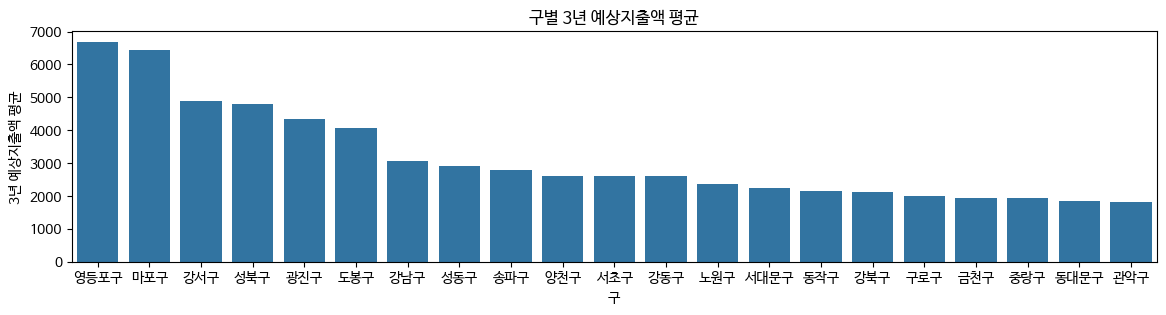

In [28]:
# user_input_year = input('계약기간이 몇년인가요? : ')
# user_input_year = int(user_input_year)
# user_input_gudong = input('어떤 기준으로 조회하고 싶으신가요?(구/동) : ')
# if user_input_gudong=='동' :
#     user_input_gu = input('어느 구에 있는 동을 조회하고 싶은가요?(nn구/전체) : ')
# else :
#     user_input_gu = 'null'

# cont_duration(user_input_year, user_input_gudong, user_input_gu)
cont_duration(3, '구', '전체')

##### 구별 보증금/월세 평균치 산출 with 3년계약시 예상지출액

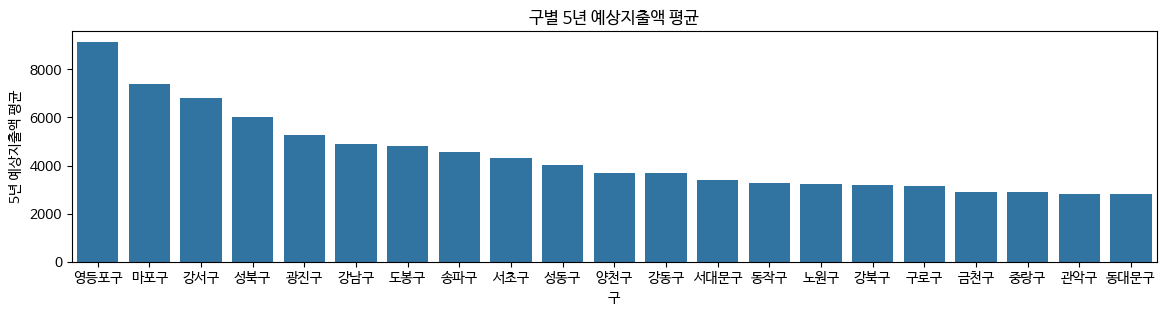

In [29]:
cont_duration(5, '구', '전체')

##### 구별 보증금/월세 평균치 산출 with 7년계약시 예상지출액

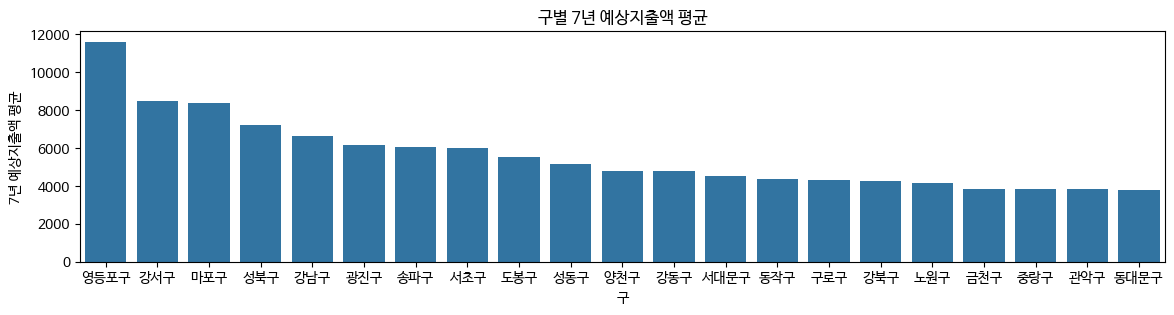

In [30]:
cont_duration(7, '구', '송파구')

### EDA: 평수/지역에 따른 월세/보증금 예측
- 문제 정의: 서울 매물의 평수/지역에 따라 월세/보증금을 예측한다.
- 배경: 고객이 매물을 구할 때 보유현금 및 월 수입에 따른 예상 금액을 도출하고, 그에 따른 맞춤형 매물을 추천함으로써, 고객 만족도를 높이고 매출 증대에 기여할 수 있다.
 

In [31]:
df_cd_extract_seoul= df_cd_extract.query('region_si=="서울"')
df_cd_extract_seoul

,title,roomType,py,deposit,rentFee,region,roomOption,deposit_만,rentFee_만,deposit_cate,rentFee_cate,region_si,region_gu,region_dong,roomType_change,py_cate
0,매물번호 42074288,1인실,19.83,1000,56,서울특별시 관악구 신림동,벽걸이형\n책상\n옷장\n신발장\n냉장고\n세탁기\n싱크대\n인덕션\n전자레인지\n...,1000,56,3,3,서울,관악구,신림동,0.0,1
1,매물번호 42051547,그 외,26.32,2000,75,서울특별시 강북구 수유동,벽걸이형\n침대\n신발장\n냉장고\n세탁기\n싱크대\n가스레인지\nTV\n,2000,75,4,3,서울,강북구,수유동,1.0,3
2,매물번호 41995067,그 외,26.32,2000,75,서울특별시 강북구 수유동,벽걸이형\n신발장\n싱크대\n가스레인지\n무인택배함\n인터폰\nCCTV\n현관보안,2000,75,4,3,서울,강북구,수유동,1.0,3
3,매물번호 39924505,그 외,49.04,29000,30,서울특별시 강서구 공항동,천장형\n식탁\n신발장\n싱크대\n인덕션\n화재경보기\n베란다\n무인택배함\n비디오...,29000,30,6,0,서울,강서구,공항동,1.0,4
4,매물번호 39874814,그 외,96.86,15000,70,서울특별시 강서구 공항동,신발장\n싱크대\n가스레인지\n화재경보기\n베란다\n비디오폰\n인터폰\n카드키\nC...,15000,70,5,3,서울,강서구,공항동,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,매물번호 42310124,그 외,39.66,500,45,서울특별시 도봉구 방학동,싱크대\n,500,45,2,3,서울,도봉구,방학동,1.0,3
548,매물번호 42028325,1인실,22.00,200,33,서울특별시 강북구 수유동,벽걸이형\n신발장\n냉장고\n세탁기\n싱크대\n인덕션\n전자레인지\n붙박이장\nCC...,200,33,0,0,서울,강북구,수유동,0.0,2
549,매물번호 41950840,1인실,19.83,1000,50,서울특별시 강서구 화곡동,벽걸이형\n옷장\n신발장\n냉장고\n세탁기\n싱크대\n인덕션\n화재경보기\n인터폰\...,1000,50,3,3,서울,강서구,화곡동,0.0,1
552,매물번호 42254016,1인실,25.00,300,30,서울특별시 강서구 화곡동,벽걸이형\n냉장고\n세탁기\n싱크대\n가스레인지\n전자레인지\n,300,30,1,0,서울,강서구,화곡동,0.0,2


In [32]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# pd.reset_option('^display.', silent=True) # 원상복귀

In [33]:
print("서울시내 매물의 동별 평수구간(0~6)/보증금구간(0~6)에 따른 월세구간의 평균치")
pd.pivot_table(df_cd_extract_seoul, index=['region_gu', 'region_dong', 'py_cate'],
              columns='deposit_cate',
              values='rentFee_cate',
              aggfunc='mean')

서울시내 매물의 동별 평수구간(0~6)/보증금구간(0~6)에 따른 월세구간의 평균치


deposit_cate                          0    1    2         3    4         5  \
region_gu region_dong py_cate                                                
강남구       개포동         3             NaN  NaN  NaN       NaN  NaN       NaN   
          논현동         2        3.500000  NaN  NaN       NaN  NaN       NaN   
                      3        5.000000  NaN  NaN       NaN  NaN       NaN   
          대치동         4             NaN  NaN  NaN       NaN  NaN  5.000000   
          삼성동         0        4.000000  NaN  NaN       NaN  NaN       NaN   
                      2        3.000000  NaN  NaN       NaN  NaN       NaN   
          역삼동         2             NaN  NaN  NaN  3.000000  NaN       NaN   
                      3        4.000000  NaN  NaN  4.500000  NaN       NaN   
                      4        4.000000  NaN  NaN       NaN  NaN       NaN   
                      5             NaN  NaN  6.0       NaN  NaN       NaN   
          일원동         3             NaN  NaN  NaN       NaN  3.0       NaN   
강동구       둔촌동         2             NaN  NaN  NaN  3.000000  NaN       NaN   
          성내동         3             NaN  NaN  NaN       NaN  NaN  4.000000   
          암사동         3             NaN  NaN  NaN       NaN  NaN  3.000000   
          천호동         1             NaN  NaN  3.0       NaN  NaN  3.000000   
                      3             NaN  NaN  NaN       NaN  NaN       NaN   
강북구       미아동         0             NaN  0.0  NaN       NaN  NaN       NaN   
                      4             NaN  NaN  NaN       NaN  3.0       NaN   
          번동          3             NaN  NaN  NaN       NaN  NaN  0.000000   
          수유동         0             NaN  NaN  4.0  4.000000  NaN       NaN   
                      1             NaN  NaN  3.0       NaN  NaN       NaN   
                      2        0.000000  NaN  NaN       NaN  NaN       NaN   
                      3             NaN  NaN  NaN       NaN  3.0  4.000000   
강서구       공항동         1             NaN  NaN  NaN       NaN  4.0       NaN   
                      2             NaN  NaN  NaN       NaN  NaN  3.000000   
                      4             NaN  NaN  NaN       NaN  NaN       NaN   
                      6             NaN  NaN  NaN       NaN  NaN  3.000000   
          등촌동         0             NaN  NaN  NaN       NaN  0.0       NaN   
          화곡동         0             NaN  NaN  NaN  3.000000  NaN  3.000000   
                      1             NaN  NaN  NaN  3.000000  0.0  0.000000   
                      2             NaN  0.0  NaN  3.000000  NaN  3.000000   
                      3        3.000000  0.0  NaN  3.000000  3.0  4.000000   
관악구       남현동         1             NaN  NaN  NaN  1.000000  NaN       NaN   
          봉천동         0        0.000000  NaN  NaN       NaN  NaN  0.000000   
                      1        0.000000  1.0  1.0  1.000000  NaN  3.000000   
                      2             NaN  NaN  NaN  0.333333  NaN       NaN   
                      3             NaN  NaN  NaN       NaN  3.0  3.333333   
          신림동         0        0.000000  0.5  NaN  3.000000  NaN       NaN   
                      1        0.200000  1.0  NaN  3.000000  NaN  0.000000   
                      2             NaN  NaN  2.0       NaN  NaN  3.000000   
                      3        3.000000  NaN  3.0  3.000000  NaN  1.333333   
                      4             NaN  NaN  NaN       NaN  NaN  3.000000   
광진구       구의동         3             NaN  NaN  NaN  3.000000  NaN       NaN   
                      4             NaN  NaN  NaN       NaN  NaN  2.500000   
          능동          3             NaN  NaN  NaN       NaN  NaN  4.000000   
          자양동         1             NaN  NaN  NaN       NaN  NaN  4.000000   
                      2             NaN  NaN  1.0  3.000000  NaN       NaN   
                      3             NaN  NaN  NaN  3.000000  NaN       NaN   
                      4             NaN  NaN  NaN       NaN  5.0       NaN   
          중곡동         

print("서울시내 매물의 구별 평수구간(0~6)/보증금구간(0~6)에 따른 월세구간(0~6)의 평균치")
pd.pivot_table(df_cd_extract_seoul, index=['region_gu', 'py_cate'],
              columns='deposit_cate',
              values=['rentFee_cate'],
              aggfunc='mean')

In [34]:
print("서울시내 매물의 동별 평수구간(0-6)/월세구간(0-6)에 따른 보증금구간(0-6)의 평균치")
pd.pivot_table(df_cd_extract_seoul, index=['region_gu', 'region_dong', 'py_cate'],
              columns='rentFee_cate',
              values='deposit_cate',
              aggfunc='mean')

서울시내 매물의 동별 평수구간(0-6)/월세구간(0-6)에 따른 보증금구간(0-6)의 평균치


rentFee_cate                          0         1         3         4    5  \
region_gu region_dong py_cate                                                
강남구       개포동         3             NaN       NaN  6.000000       NaN  NaN   
          논현동         2             NaN       NaN  0.000000  0.000000  NaN   
                      3             NaN       NaN       NaN       NaN  0.0   
          대치동         4             NaN       NaN       NaN       NaN  5.0   
          삼성동         0             NaN       NaN       NaN  0.000000  NaN   
                      2             NaN       NaN  0.000000       NaN  NaN   
          역삼동         2             NaN       NaN  3.000000       NaN  NaN   
                      3             NaN       NaN       NaN  0.333333  3.0   
                      4             NaN       NaN       NaN  0.000000  NaN   
                      5             NaN       NaN       NaN       NaN  NaN   
          일원동         3             NaN       NaN  4.000000       NaN  NaN   
강동구       둔촌동         2             NaN       NaN  3.000000       NaN  NaN   
          성내동         3             NaN       NaN       NaN  5.000000  NaN   
          암사동         3             NaN       NaN  5.000000       NaN  NaN   
          천호동         1             NaN       NaN  3.500000       NaN  NaN   
                      3             NaN       NaN  6.000000       NaN  NaN   
강북구       미아동         0        1.000000       NaN       NaN       NaN  NaN   
                      4             NaN       NaN  4.000000       NaN  NaN   
          번동          3        5.000000       NaN       NaN       NaN  NaN   
          수유동         0             NaN       NaN       NaN  2.666667  NaN   
                      1             NaN       NaN  2.000000       NaN  NaN   
                      2        0.000000       NaN       NaN       NaN  NaN   
                      3             NaN       NaN  4.000000  5.000000  NaN   
강서구       공항동         1             NaN       NaN       NaN  4.000000  NaN   
                      2             NaN       NaN  5.000000       NaN  NaN   
                      4        6.000000       NaN       NaN       NaN  NaN   
                      6             NaN       NaN  5.000000       NaN  NaN   
          등촌동         0        4.000000       NaN       NaN       NaN  NaN   
          화곡동         0             NaN       NaN  3.666667       NaN  NaN   
                      1        5.000000       NaN  3.000000       NaN  NaN   
                      2        1.000000       NaN  4.000000       NaN  NaN   
                      3        1.000000       NaN  2.500000  5.000000  NaN   
관악구       남현동         1             NaN  3.000000       NaN       NaN  NaN   
          봉천동         0        1.666667       NaN       NaN       NaN  NaN   
                      1        0.000000  2.000000  5.000000       NaN  NaN   
                      2        3.000000  3.000000       NaN       NaN  NaN   
                      3             NaN       NaN  4.666667  5.000000  NaN   
          신림동         0        0.142857  1.000000  3.000000       NaN  NaN   
                      1        1.000000  0.833333  3.000000       NaN  NaN   
                      2             NaN  2.000000  3.500000       NaN  NaN   
                      3        5.500000       NaN  1.666667  5.000000  NaN   
                      4             NaN       NaN  5.000000       NaN  NaN   
광진구       구의동         3             NaN       NaN  3.000000       NaN  NaN   
                      4        5.500000       NaN       NaN       NaN  5.0   
          능동          3             NaN       NaN       NaN  5.000000  NaN   
          자양동         1             NaN       NaN       NaN  5.000000  NaN   
                      2             NaN  2.000000  3.000000       NaN  NaN   
                      3             NaN       NaN  3.000000       NaN  NaN   
                      4             NaN       NaN       NaN       NaN  4.0   
          중곡동         

In [35]:
print("서울시내 매물의 구별 평수구간(0-6)/월세구간(0-6)에 따른 보증금구간(0-6)의 평균치")
pd.pivot_table(df_cd_extract_seoul, index=['region_gu', 'py_cate'],
              columns='rentFee_cate',
              values=['deposit_cate'],
              aggfunc='mean')

서울시내 매물의 구별 평수구간(0-6)/월세구간(0-6)에 따른 보증금구간(0-6)의 평균치


deposit_cate                                        
rentFee_cate                 0         1         3         4    5    6
region_gu py_cate                                                     
강남구       0                NaN       NaN       NaN  0.000000  NaN  NaN
          2                NaN       NaN  1.000000  0.000000  NaN  NaN
          3                NaN       NaN  5.000000  0.333333  1.5  NaN
          4                NaN       NaN       NaN  0.000000  5.0  NaN
          5                NaN       NaN       NaN       NaN  NaN  2.0
강동구       1                NaN       NaN  3.500000       NaN  NaN  NaN
          2                NaN       NaN  3.000000       NaN  NaN  NaN
          3                NaN       NaN  5.666667  5.000000  NaN  NaN
강북구       0           1.000000       NaN       NaN  2.666667  NaN  NaN
          1                NaN       NaN  2.000000       NaN  NaN  NaN
          2           0.000000       NaN       NaN       NaN  NaN  NaN
          3           5.000000       NaN  4.000000  5.000000  NaN  NaN
          4                NaN       NaN  4.000000       NaN  NaN  NaN
강서구       0           4.000000       NaN  3.666667       NaN  NaN  NaN
          1           5.000000       NaN  3.000000  4.000000  NaN  NaN
          2           1.000000       NaN  4.600000       NaN  NaN  NaN
          3           1.000000       NaN  2.500000  5.000000  NaN  NaN
          4           6.000000       NaN       NaN       NaN  NaN  NaN
          6                NaN       NaN  5.000000       NaN  NaN  NaN
관악구       0           0.600000  1.000000  3.000000       NaN  NaN  NaN
          1           0.833333  1.454545  4.000000       NaN  NaN  NaN
          2           3.000000  2.500000  3.500000       NaN  NaN  NaN
          3           5.500000       NaN  3.166667  5.000000  NaN  NaN
          4                NaN       NaN  5.000000       NaN  NaN  NaN
광진구       0                NaN  2.000000  2.000000       NaN  NaN  NaN
          1           5.000000       NaN       NaN  5.000000  NaN  NaN
          2                NaN  2.000000  3.000000       NaN  NaN  NaN
          3                NaN       NaN  3.500000  3.666667  NaN  NaN
          4           5.500000       NaN       NaN       NaN  4.0  NaN
          5           6.000000  2.000000       NaN       NaN  NaN  NaN
구로구       0                NaN  1.000000       NaN       NaN  NaN  NaN
          2           2.000000       NaN  0.000000       NaN  NaN  NaN
금천구       0           0.000000  0.000000       NaN       NaN  NaN  NaN
          2                NaN  2.000000       NaN       NaN  NaN  NaN
노원구       0           2.500000       NaN       NaN       NaN  NaN  NaN
          1                NaN       NaN  3.000000       NaN  NaN  NaN
          2           3.000000       NaN       NaN       NaN  NaN  NaN
도봉구       0                NaN  1.000000       NaN       NaN  NaN  NaN
          1           5.000000       NaN       NaN       NaN  NaN  NaN
          3           5.000000       NaN  2.000000       NaN  NaN  NaN
          4                NaN       NaN       NaN       NaN  3.0  NaN
동대문구      0           4.000000  1.333333  3.000000       NaN  NaN  NaN
          1                NaN  2.000000       NaN       NaN  NaN  NaN
          2                NaN  0.500000       NaN  3.000000  NaN  NaN
          3                NaN  5.000000  1.666667  4.000000  5.0  NaN
동작구       0           1.000000  1.250000       NaN       NaN  NaN  NaN
          1                NaN  2.333333  2.333333       NaN  NaN  NaN
          2                NaN       NaN  3.000000       NaN  NaN  NaN
          3                NaN  3.000000       NaN       NaN  NaN  NaN
마포구       2                NaN  5.000000       NaN       NaN  NaN  NaN
          3           5.000000       NaN  3.000000       NaN  NaN  NaN
          4                NaN       NaN       NaN       NaN  5.0  NaN
서대문구      0                NaN  1.000000  2.000000       NaN  NaN  NaN
          2                NaN       NaN  

In [36]:
print("서울시내 매물 전체의 평수구간(0-6)/월세구간(0-6)에 따른 보증금구간(0-6)의 평균치")
pd.pivot_table(df_cd_extract_seoul, index=['py_cate'],
              columns='rentFee_cate',
              values=['deposit_cate'],
              aggfunc='mean')

서울시내 매물 전체의 평수구간(0-6)/월세구간(0-6)에 따른 보증금구간(0-6)의 평균치


deposit_cate                                             
rentFee_cate            0         1         3         4         5    6
py_cate                                                               
0                1.428571  1.809524  3.250000  2.833333  3.000000  NaN
1                2.727273  1.750000  3.000000  4.333333       NaN  NaN
2                2.000000  2.090909  2.782609  1.500000  3.000000  NaN
3                4.230769  3.600000  3.515152  2.782609  2.571429  0.0
4                5.500000       NaN  4.666667  3.600000  4.285714  NaN
5                6.000000  3.500000       NaN       NaN       NaN  3.5
6                     NaN       NaN  5.000000       NaN       NaN  NaN

In [37]:
print("서울시내 매물 전체의 평수구간(0-6)/보증금구간(0-6)에 따른 월세구간(0-6)의 평균치")
pd.pivot_table(df_cd_extract_seoul, index=['py_cate'],
              columns='deposit_cate',
              values=['rentFee_cate'],
              aggfunc='mean')

서울시내 매물 전체의 평수구간(0-6)/보증금구간(0-6)에 따른 월세구간(0-6)의 평균치


rentFee_cate                                                    \
deposit_cate            0         1         2         3         4         5   
py_cate                                                                       
0                0.357143  0.833333  1.692308  3.000000  2.333333  1.500000   
1                0.625000  1.000000  2.111111  2.454545  2.666667  1.700000   
2                2.555556  0.500000  1.083333  2.384615  3.000000  2.750000   
3                4.214286  2.000000  1.428571  3.176471  3.125000  2.740741   
4                4.000000       NaN       NaN  5.000000  3.200000  3.777778   
5                     NaN       NaN  3.500000       NaN       NaN  3.500000   
6                     NaN       NaN       NaN       NaN       NaN  3.000000   

                   
deposit_cate    6  
py_cate            
0             NaN  
1             0.0  
2             NaN  
3             1.5  
4             0.0  
5             0.0  
6             NaN

### 분석결과
- 동/구, 평수 구간, 보증금 혹은 월세 구간을 index로 두고 피벗테이블을 생성한 결과, 데이터셋의 크기가 작아 피벗테이블을 생성했을 때 결측치가 많이 생겨 통일성 있는 결과는 얻지 못했다.
- 따라서 전체 매물을 기준으로 index를 py_cate로 주고 보증금구간에 따른 월세구간의 평균, 월세 구간에 따른 보증금 구간의 평균을 구해봤을 때는 결측치가 적어 가독성 있는 피벗테이블 결과를 얻을 수 있었다.
- 월세나 보증금 구간이 높을경우, 보증금이나 월세 구간은 평수와 상관 없이 작아졌다.
- -> 이는 월 지출을 월등히 많이 할 수 있다면 가용 현금이 적어도 되고, 가용 현금이 월등히 많다면 월 지출이 적어진다는 것을 의미한다.
- 월세나 보증금 구간이 낮을 경우, 낮은 평수에서는 보증금이나 월세의 평균도 낮았으나 높은 평수에서는 보증금이나 월세의 평균도 같이 높아졌다.
- -> 평수구간 0-3구간일 때는 보증금과 월세의 부담이 적을 것으로 예상되나 평수구간 4-6일 경우, 월 수입(월세)이 적다면 가용 현금(보증금)의 부담이 클 것으로 예상된다.

## CDA
- 지역별(범주) 매물의 평균 거주 비용(연속)의 차이가 있는지 분석
- 보증금(연속)에 따른 평균 월세(연속)의 차이가 있는지 분석 / 임의적으로 설정한 보증금구간(범주)에 따른 평균 월세구간(범주)의 차이가 있는지 분석 -> 어떤 데이터가 더 효과적일지 판단 
- 월세(연속)에 따른 평균 보증금(연속)의 차이가 있는지 분석 / 임의적으로 설정한 월세구간(범주)에 따른 평균 보증금구간(범주)의 차이가 있는지 분석 -> 어떤 데이터가 더 효과적일지 판단 

### 분석 내용: 지역별(범주) 매물의 평균 거주 비용(연속)의 차이가 있는지 분석
- 귀무가설: 차이가 없다
- 대립가설: 차이가 있다

#### 정규성검증
- 검정결과 정규분포임을 확인->등분산검증을 위해 levene검정 시행

In [38]:
import scipy.stats as stats

In [79]:
df_cd_years = df_cd_extract.query('region_si=="서울"')[['region_gu','region_dong', 'deposit_만', 'rentFee_만']]
df_cd_years['years'] = df_cd_years['deposit_만'] + 3*12*df_cd_years['rentFee_만']

In [80]:
len(df_cd_years['region_gu'].unique())

23

In [81]:
df_cd_extract_seoul

,title,roomType,py,deposit,rentFee,region,roomOption,deposit_만,rentFee_만,deposit_cate,rentFee_cate,region_si,region_gu,region_dong,roomType_change,py_cate
0,매물번호 42074288,1인실,19.83,1000,56,서울특별시 관악구 신림동,벽걸이형\n책상\n옷장\n신발장\n냉장고\n세탁기\n싱크대\n인덕션\n전자레인지\n...,1000,56,3,3,서울,관악구,신림동,0.0,1
1,매물번호 42051547,그 외,26.32,2000,75,서울특별시 강북구 수유동,벽걸이형\n침대\n신발장\n냉장고\n세탁기\n싱크대\n가스레인지\nTV\n,2000,75,4,3,서울,강북구,수유동,1.0,3
2,매물번호 41995067,그 외,26.32,2000,75,서울특별시 강북구 수유동,벽걸이형\n신발장\n싱크대\n가스레인지\n무인택배함\n인터폰\nCCTV\n현관보안,2000,75,4,3,서울,강북구,수유동,1.0,3
3,매물번호 39924505,그 외,49.04,29000,30,서울특별시 강서구 공항동,천장형\n식탁\n신발장\n싱크대\n인덕션\n화재경보기\n베란다\n무인택배함\n비디오...,29000,30,6,0,서울,강서구,공항동,1.0,4
4,매물번호 39874814,그 외,96.86,15000,70,서울특별시 강서구 공항동,신발장\n싱크대\n가스레인지\n화재경보기\n베란다\n비디오폰\n인터폰\n카드키\nC...,15000,70,5,3,서울,강서구,공항동,1.0,6
5,매물번호 40548634,1인실,20.46,2000,80,서울특별시 강서구 공항동,천장형\n신발장\n냉장고\n세탁기\n싱크대\n인덕션\n화재경보기\n비디오폰\n인터폰...,2000,80,4,4,서울,강서구,공항동,0.0,1
6,매물번호 40548634,1인실,20.46,2000,80,서울특별시 강서구 공항동,천장형\n신발장\n냉장고\n세탁기\n싱크대\n인덕션\n화재경보기\n비디오폰\n인터폰...,2000,80,4,4,서울,강서구,공항동,0.0,1
8,매물번호 39945626,그 외,49.04,29000,30,서울특별시 강서구 공항동,천장형\n신발장\n싱크대\n가스레인지\n인덕션\n화재경보기\n베란다\n비디오폰\nC...,29000,30,6,0,서울,강서구,공항동,1.0,4
9,매물번호 42200711,1인실,16.52,2000,45,서울특별시 성북구 하월곡동,벽걸이형\n침대\n책상\n옷장\n신발장\n냉장고\n세탁기\n싱크대\n인덕션\n전자레...,2000,45,4,3,서울,성북구,하월곡동,0.0,0
10,매물번호 41403654,1인실,15.00,100,25,서울특별시 관악구 신림동,벽걸이형\n침대\n책상\n옷장\n신발장\n냉장고\n세탁기\n싱크대\n인덕션\n전자레...,100,25,0,0,서울,관악구,신림동,0.0,0


In [82]:
# stats.shapiro 사용한 정규 분포 검정
w_statistic, p_value = stats.shapiro(df_cd_years['years'].dropna())
print(f"W 통계량: {w_statistic}, p-value: {p_value}")


W 통계량: 0.6595367064354274, p-value: 1.2297502694005096e-22


#### Levene test
- 검정결과 p-value가 0.05보다 크므로 등분산으로 이루어져있음을 확인함 -> 범주형 3집단 이상이므로 ANOVA Test 시행

In [83]:
from scipy.stats import levene
groups = df_cd_years.groupby('region_gu')['years'].apply(list)
stat, p = levene(*groups)
print(f'Levene 검정 결과: 통계량 = {stat}, p-value = {p}')

Levene 검정 결과: 통계량 = 1.155251385005772, p-value = 0.2900529317869117


#### ANOVA Test
- 지역(구)이 3년간 거주비용에 유의미한 영향을 미치는 것으로 나타났으며, Residual(잔차)의 F값이 NaN으로 나타나 이는 오차항에 대한 분석 결과가 없거나 잘못된 분석이 있을 수 있다는 뜻이므로 추가적인 오차항에 대한 분석이 필요하다.





In [84]:
# !pip install statsmodels

In [85]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# OLS 모델 생성: '3years'를 종속 변수로, 'region_gu'을 독립 변수로 설정
model = ols('years ~ C(region_gu)', data=df_cd_years).fit()

# ANOVA 테이블 생성
anova_results = sm.stats.anova_lm(model, typ=1)

print(anova_results)


                 df        sum_sq       mean_sq         F    PR(>F)
C(region_gu)   22.0  9.860736e+08  4.482153e+07  1.651004  0.036883
Residual      240.0  6.515531e+09  2.714804e+07       NaN       NaN


In [86]:
states_list = df_cd_years['region_gu'].unique().tolist()
states_list

['관악구',
 '강북구',
 '강서구',
 '성북구',
 '강동구',
 '금천구',
 '광진구',
 '서초구',
 '성동구',
 '마포구',
 '도봉구',
 '송파구',
 '강남구',
 '서대문구',
 '동대문구',
 '중랑구',
 '영등포구',
 '은평구',
 '동작구',
 '용산구',
 '양천구',
 '노원구',
 '구로구']

In [87]:
series_list = []
for state in states_list :
  condition = f"region_gu =='{state}'"
  series_purchase = df_cd_years.query(condition)['years'].dropna()
  series_list.append(series_purchase)
series_list

[0       3016
 10      1000
 11      1740
 12     12880
 13      2980
 14       928
 16       964
 18      6620
 22       928
 42      1812
 45      1216
 67      1720
 68      1720
 69      4340
 87      6080
 96      4620
 121     2980
 152     2548
 165     7160
 169     2440
 173     5520
 174     5520
 184     1280
 195     1632
 211     9160
 227     2332
 228     2372
 232     1776
 249     3720
 279     1940
 280      750
 306     1108
 322     1180
 327     1540
 329    24620
 330     2300
 337     1130
 350      856
 351     8880
 367     1180
 392     1632
 432    14080
 433     9360
 451      784
 453     2000
 463     1596
 472     3700
 484     1416
 512     1976
 514     1560
 516     2012
 553    19720
 Name: years, dtype: int64,
 1       4700
 2       4700
 17      4700
 107    15780
 153     4520
 294     3880
 295     3880
 369     1344
 424     3920
 476     2120
 477     2120
 515     8240
 548     1388
 Name: years, dtype: int64,
 3      30080
 4      17520
 5    

In [88]:
# 등분산 검증
statistic, pvalue=stats.kruskal(*series_list)
pvalue, round(pvalue,2)

(3.410954327556991e-06, 0.0)

### 보증금(연속)와 월세(연속)의 상관관계가 있는지 분석 / 임의적으로 설정한 보증금구간(범주)와 월세구간(범주)의 상관관계가 있는지 분석 -> 어떤 데이터가 더 효과적일지 판단
- 귀무가설: 보증금에 따른 평균 월세의 차이가 없다. / 지역별 보증금에 따른 평균 월세의 차이가 없다.
- 대립가설: 보증금에 따른 평균 월세의 차이가 없다. / 지역별 보증금에 따른 평균 월세의 차이가 있다.
- 보증금이 올라갈수록 평균 월세는 낮아질 것이라고 예상하였지만 검정 결과, 연속형 변수 그대로 적용했을 때와 구간을 나눴을 때 모두 전체 지역에서 3, 4개의 지역구에서만 p-value가 0.05보다 낮아 신뢰구간 95%를 만족하였으며, 상관계수는 0.5, 0.7, 1, -1 등 각각 통일된 결과가 나오지 않았다. 따라서 귀무가설이 채택되어 보증금에 따른 평균 월세에 차이가 없다고 밝혀졌다.

#### 1) 보증금(연속)에 따른 평균 월세(연속)의 차이가 있는지 분석

##### 정규성 검증 - Shapiro Test
- 검정 결과, p-value가 0.05보다 작으므로 두 변수 모두 정규분포를 따르지 않음 - > spearmanr 이용해 상관관계 확인

In [89]:
df_cd_extract_seoul.columns

Index(['title', 'roomType', 'py', 'deposit', 'rentFee', 'region', 'roomOption',
       'deposit_만', 'rentFee_만', 'deposit_cate', 'rentFee_cate', 'region_si',
       'region_gu', 'region_dong', 'roomType_change', 'py_cate'],
      dtype='object')

In [90]:
# stats.shapiro 사용한 정규 분포 검정 -> 정규분포를 따르지 않음
d_statistic, d_p_value = stats.shapiro(df_cd_extract_seoul['deposit_만'].dropna())
r_statistic, r_p_value = stats.shapiro(df_cd_extract_seoul['rentFee_만'].dropna())
print(f"보증금 통계량: {d_statistic}, p-value: {d_p_value}, 월세 통계량: {r_statistic}, p-value: {r_p_value} ")


보증금 통계량: 0.5553288317834386, p-value: 2.2376994697408274e-25, 월세 통계량: 0.8308003109701805, p-value: 2.986308426345576e-16 


##### 상관관계 검증 - spearmanr
- 검정 결과, p-value가 0.05보다 크므로 귀무가설 채택, 보증금과 월세의 상관관계가 없어 통계적으로 유의하지 않다.

In [91]:
corr, p_value = spearmanr(df_cd_extract_seoul['deposit_만'],df_cd_extract_seoul['rentFee_만'])
print(f"Spearman 상관계수: {corr}, P-value: {p_value}")

Spearman 상관계수: 0.09379832898266409, P-value: 0.1292024385636576


In [92]:
list_region_gu = df_cd_extract_seoul['region_gu'].unique().tolist()

In [93]:
from scipy.stats import spearmanr

# Spearman 상관계수 및 P-value 계산
for x in list_region_gu :
    corr, p_value = spearmanr(df_cd_extract_seoul.query(f'region_gu=="{x}" and (py_cate==1 or py_cate==2)')['deposit_만'],df_cd_extract_seoul.query(f'region_gu=="{x}"and (py_cate==1 or py_cate==2)')['rentFee_만'])
    if p_value < 0.05 :
        print(f"{x}의 Spearman 상관계수: {corr}, P-value: {p_value}")
    else : 
        # print(f"검정결과 상관관계 없음: {x}의 Spearman 상관계수: {corr}, P-value: {p_value}")
        pass
    

관악구의 Spearman 상관계수: 0.4593963621486322, P-value: 0.0159246700328261
강북구의 Spearman 상관계수: 1.0, P-value: 0.0
구로구의 Spearman 상관계수: -1.0, P-value: 0.0


/tmp/ipykernel_24/3936380266.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = spearmanr(df_cd_extract_seoul.query(f'region_gu=="{x}" and (py_cate==1 or py_cate==2)')['deposit_만'],df_cd_extract_seoul.query(f'region_gu=="{x}"and (py_cate==1 or py_cate==2)')['rentFee_만'])


#### 2) 임의적으로 설정한 보증금구간(범주)에 따른 평균 월세구간(범주)의 차이가 있는지 분석

##### 정규성 검증 - Shapiro test
- 결과 - p-value가 0.05 이하이므로 귀무가설 채택, 정규분포를 따르지 않음.

In [94]:
# stats.shapiro 사용한 정규 분포 검정 -> 정규분포를 따르지 않음
d_statistic, d_p_value = stats.shapiro(df_cd_extract_seoul['deposit_cate'].dropna())
r_statistic, r_p_value = stats.shapiro(df_cd_extract_seoul['rentFee_cate'].dropna())
print(f"보증금 통계량: {d_statistic}, p-value: {d_p_value}, 월세 통계량: {r_statistic}, p-value: {r_p_value} ")

보증금 통계량: 0.9054084886993092, p-value: 8.278370649720663e-12, 월세 통계량: 0.8794836185019463, p-value: 1.4549186711978015e-13 


##### 상관관계 검증 - spearmanr
- 검정 결과, p-value가 0.05보다 크므로 귀무가설 채택, 보증금과 월세의 상관관계가 없어 통계적으로 유의하지 않다.

In [95]:
corr, p_value = spearmanr(df_cd_extract_seoul['deposit_cate'],df_cd_extract_seoul['rentFee_cate'])
print(f"Spearman 상관계수: {corr}, P-value: {p_value}")


Spearman 상관계수: 0.11892952065176281, P-value: 0.054058445613055575


In [96]:
from scipy.stats import spearmanr

# Spearman 상관계수 및 P-value 계산
for x in list_region_gu :
    corr, p_value = spearmanr(df_cd_extract_seoul.query(f'region_gu=="{x}" and (py_cate==1 or py_cate==2)')['deposit_cate'],df_cd_extract_seoul.query(f'region_gu=="{x}"and (py_cate==1 or py_cate==2)')['rentFee_cate'])
    if p_value < 0.05 :
        print(f"{x}의 Spearman 상관계수: {corr}, P-value: {p_value}")
    else : 
        # print(f"검정결과, 상관관계없음 {x}의 Spearman 상관계수: {corr}, P-value: {p_value}")
        pass


관악구의 Spearman 상관계수: 0.5079983434086293, P-value: 0.006825855380893397
강북구의 Spearman 상관계수: 1.0, P-value: 0.0
중랑구의 Spearman 상관계수: 0.7666666666666666, P-value: 0.044343728365250364
구로구의 Spearman 상관계수: -1.0, P-value: 0.0


/tmp/ipykernel_24/1886323086.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = spearmanr(df_cd_extract_seoul.query(f'region_gu=="{x}" and (py_cate==1 or py_cate==2)')['deposit_cate'],df_cd_extract_seoul.query(f'region_gu=="{x}"and (py_cate==1 or py_cate==2)')['rentFee_cate'])
/tmp/ipykernel_24/1886323086.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = spearmanr(df_cd_extract_seoul.query(f'region_gu=="{x}" and (py_cate==1 or py_cate==2)')['deposit_cate'],df_cd_extract_seoul.query(f'region_gu=="{x}"and (py_cate==1 or py_cate==2)')['rentFee_cate'])
/tmp/ipykernel_24/1886323086.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = spearmanr(df_cd_extract_seoul.query(f'region_gu=="{x}" and (py_cate==1 or py_cate==2)')['deposit_cate'],df_cd_extract_seoul.query(f'region_gu=="{x}"and (py_cate==1